In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [3]:
path = '../../../Data/2025/08 - August/'
AMS_paths = ['250820_sabinene_O3_20C/', '250822_Sabinene_100ppb_0C/', '250825_Sabinene_100ppb_10C/', 
             '250826_Sabinene_100ppb_neg10C/', '250828_b-pinene_100ppb_20C/']

AMS = {}
for AMS_path in AMS_paths:
    df = import_txt(f'{path}{AMS_path}AMS/', '', 't_series', '%d-%m-%Y %H:%M:%S', 0)
    name = AMS_path.split('_')[0]
    AMS[name] = df

print(AMS['250822'].keys())

Index(['t_series', 'HROrg_M_all', 'HRNO3_M_all', 'HRSO4_M_all', 'HRNH4_M_all',
       'HRChl_M_all', 'Ratio_H_C_all_IA', 'Ratio_O_C_all_IA',
       'familyCHN_M_all', 'familyCHO1_M_all', 'familyCHO1N_M_all',
       'familyCH_M_all', 'MSSM_all_HROrg43', 'MSSM_all_HROrg44', 'Time'],
      dtype='object')


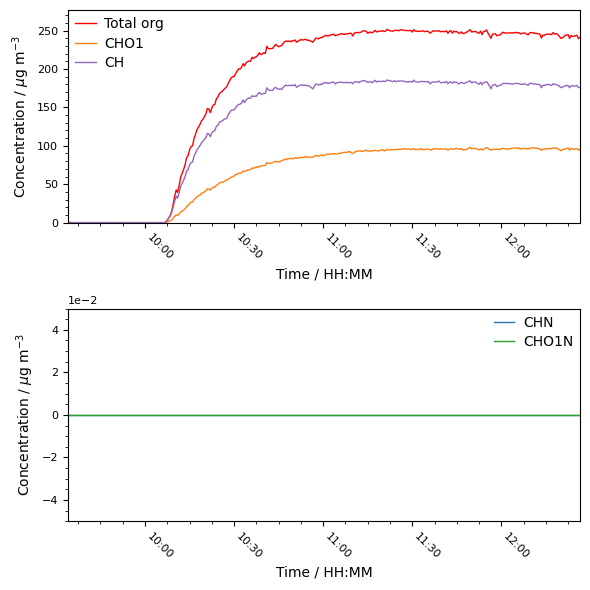

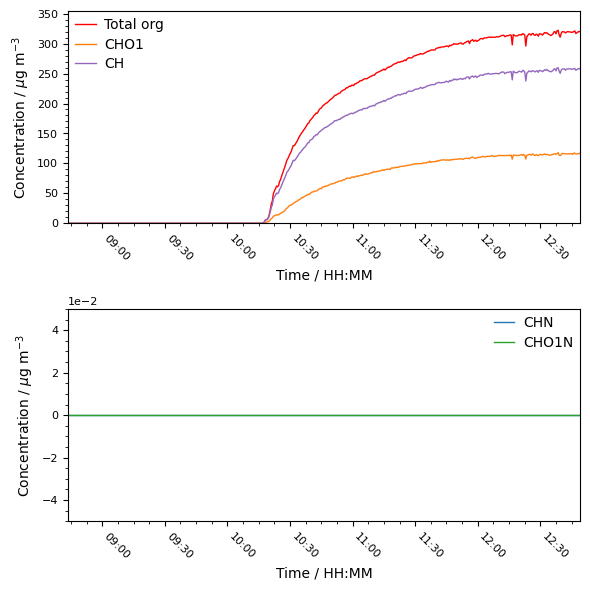

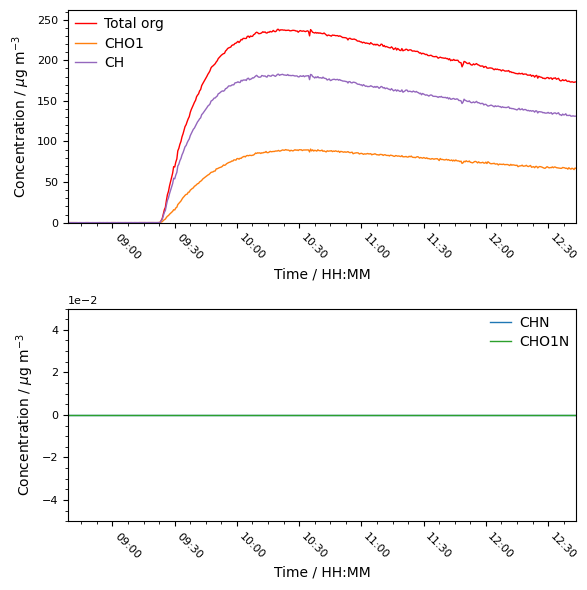

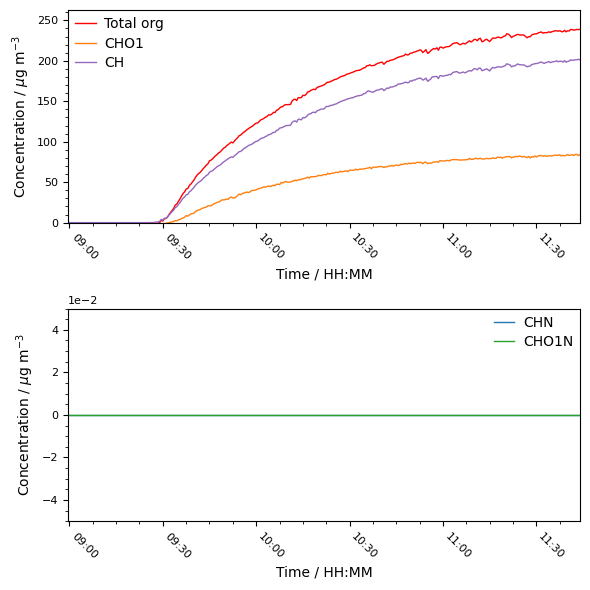

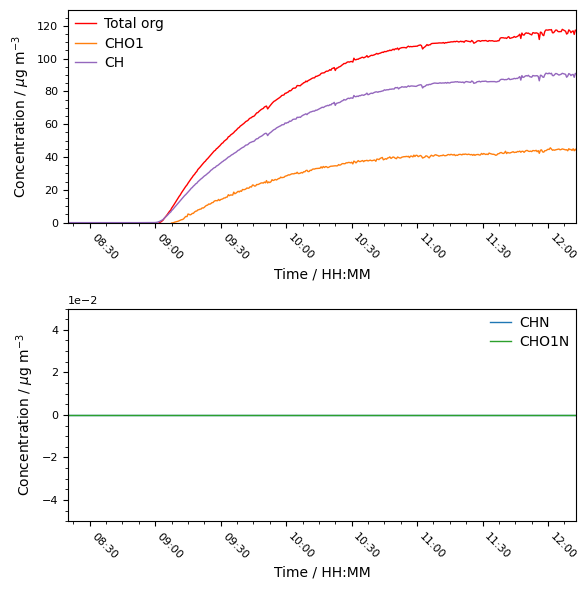

In [12]:
colors = ['r', 'tab:orange', 'tab:purple', 'tab:blue', 'tab:green']

for key in AMS.keys():
    fig, ax = plt.subplots(2,1, figsize = (6, 6))

    for color, df_key in zip(colors[:3], ['HROrg_M_all', 'familyCHO1_M_all', 'familyCH_M_all']):
        plot_total(ax[0], AMS[key], df_key, color, False)

    ax[0].set(ylabel = 'Concentration / $\mu$g m$^{-3}$', ylim = (0, max(AMS[key]['HROrg_M_all'])+0.1*max(AMS[key]['HROrg_M_all'])))
    ax[0].legend(['Total org', 'CHO1', 'CH'])

    for color, df_key in zip(colors[3:], ['familyCHN_M_all', 'familyCHO1N_M_all']):
        plot_total(ax[1], AMS[key], df_key, color, False)

    ax[1].set(ylabel = 'Concentration / $\mu$g m$^{-3}$', ylim = (0, max(AMS[key]['familyCHN_M_all'])+0.1*max(AMS[key]['familyCHN_M_all'])))
    ax[1].legend(['CHN', 'CHO1N'])

    fig.tight_layout()
    fig.savefig(f'{key}_timeseries.jpg', dpi = 600)